# Aproksimacija nelinearnog sistema linearnim

### **1. Napišite jednačine dinamičkog modela obrade pre-crRNA na osnovu šeme.**

\begin{equation}
    \frac{d[pre-crRNA]}{dt} = \phi - [pre-crRNA](\lambda_{pre} + k)
\end{equation}

\begin{equation}
    \frac{d[crRNA]}{dt} = k[pre-crRNA] - \lambda_{crRNA}[crRNA]
\end{equation}

### **2. Napišite uslov za postizanje dinamičke ravnoteže u sistemu i izvedite izraze za ravnotežne količine pre-crRNA i crRNA.**

Uslovi su: $\frac{d[pre-crRNA]}{dt} = 0$ i $\frac{d[crRNA]}{dt} = 0$.

\begin{equation}
    0 = \phi - [pre-crRNA](\lambda_{pre} + k) \Rightarrow \phi = [pre-crRNA](\lambda_{pre} + k)
\end{equation}

\begin{equation}
    0 = k[pre-crRNA] - \lambda_{crRNA}[crRNA] \Rightarrow k[pre-crRNA] = \lambda_{crRNA}[crRNA]
\end{equation}

### **3. Pokažite da važi relacija: $\Delta crRNA = - \frac{\lambda_{pre}}{\lambda_{crRNA}} \Delta pre - crRNA$**

\begin{equation}
    0 = \phi - \lambda_{pre}[pre-crRNA] - k[pre-crRNA]
\end{equation}

\begin{equation}
    0 = k[pre-crRNA] - \lambda_{crRNA}[crRNA]
\end{equation}

Sabiranje ove dve jednačine daje:

\begin{equation}
    0 = \phi - \lambda_{pre}[pre-crRNA] - \lambda_{crRNA}[crRNA]
\end{equation}

Dalje:

\begin{equation}
    0 = \phi - \lambda_{pre}[pre-crRNA]' - k'[pre-crRNA]'
\end{equation}

\begin{equation}
    0 = k'[pre-crRNA]' - \lambda_{crRNA}[crRNA]'
\end{equation}

Sabiranje ove dve jednačine daje:

\begin{equation}
    0 = \phi - \lambda_{pre}[pre-crRNA]' - \lambda_{crRNA}[crRNA]'
\end{equation}

Oduzimanje jednačine br. 3 od poslednje jednačine daje rezultat:

\begin{equation}
    0 = -\lambda_{pre} \Delta pre-crRNA - \lambda_{crRNA} \Delta crRNA \ 
    \Rightarrow \lambda_{crRNA} \Delta crRNA = - \lambda_{pre} \Delta pre-crRNA
\end{equation}

Na kraju se dobija traženi izraz:

\begin{equation}
    \Delta crRNA = -\frac{\lambda_{pre}}{\lambda_{crRNA}} 
\end{equation}

### **4. Šta konkretno ova jednačina govori o ponašanju sistema? Objasnite rečima. Da li vam nešto deluje iznenađujuće u ovom zaključku? U CRISPR-Cas sistemu tipa I-E je izmereno da po veštačkoj aktivaciji sistema, ekspresijom velike količine Cas proteina, količina pre-crRNA opadne za ~1 red veličine, a količina crRNA poraste za ~2 reda veličine. Takođe, uočeno je da se molekuli pre-crRNA veoma brzo nespeccifično razgrađuju. Ponudite moguće objašnjenje za ovu osobinu sistema. Kako ona doprinosi funkciji sistema?**

Jednačina ukazuje da pri smanjenju koncentracije pre-crRNA raste koncentracija crRNA, jer je $\frac{\lambda_{pre}}{\lambda_{crRNA}} > 0$. Pritom, što je ovaj odnos veći, crRNA brže nastaje, što ima smisla budući da crRNA jedino nastaje kroz specifičnu degradaciju pre-crRNA od strane Cas proteina. Razlike u dinamici koncentracija ove dve vrste RNK su posledica toga što crRNA poseduje znatno veću stabilnost od pre-crRNA, koja se brzo razgrađuje. Brza, nespecifična razgradnja pre-crRNA predstavlja mehanizam kojim se obezbeđuje da se crRNA proizvodi samo u uslovima stvarne potrebe, što doprinosi preciznosti i energetskoj efikasnosti funkcionisanja sistema.


### **5. Da bismo rešili sistem diferencijalnih jednačina, odnosno videli kako se koncentracije pre-crRNA i crRNA menjaju sa vremenom, neophodno je da zadamo početne uslove. Uzmimo da je na početku sistem uravnotežen u odsustvu Cas proteina koji seku pre-crRNA, tj. da je k = 0, i da su promene crRNA i pre-crRNA u vremenu takođe 0. Primenite ove uslove na diferencijalne jednačine i odredite početne koncentracije pre-crRNA i crRNA.**

Za pre-crRNA:

\begin{equation}
    \frac{d[pre-crRNA]}{dt} = \phi [pre-crRNA](\lambda_{pre} + k) \
    \Rightarrow 0 = \phi - [pre-crRNA]\lambda_{pre}
\end{equation}

\begin{equation} 
    [pre-crRNA] = \frac{\phi}{\lambda_{pre}}
\end{equation}

Za crRNA:

\begin{equation}
    \frac{d[crRNA]}{dt} = k[pre-crRNA] - \lambda_{crRNA}[crRNA] \
    \Rightarrow 0 = \lambda_{crRNA}[crRNA]
\end{equation}

\begin{equation}
    [crRNA] = 0
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Parametri
phi = 10.0
k = 1.0
lambda_pre = 1.0
lambda_cr = 0.01

P0 = phi / lambda_pre
R0 = 0.0

dt = 0.0001
t_end = 500.0
t = np.arange(0.0, t_end + dt, dt)

P = np.zeros_like(t)
R = np.zeros_like(t)

P[0], R[0] = P0, R0

In [15]:
# Izračunavanje
for i in range(len(t) - 1):
    P_i = P[i]
    R_i = R[i]

    dP_dt = phi - (lambda_pre + k) * P_i
    dR_dt = k * P_i - lambda_cr * R_i

    P[i+1] = P_i + dt * dP_dt
    R[i+1] = R_i + dt * dR_dt

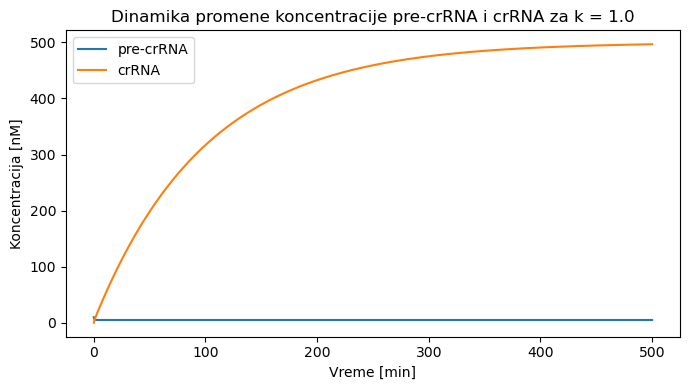

In [16]:
# Grafik
plt.figure(figsize=(7,4))
plt.plot(t, P, label="pre-crRNA")
plt.plot(t, R, label="crRNA")
plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Dinamika promene koncentracije pre-crRNA i crRNA za k = {k}")
plt.legend()
plt.tight_layout()
plt.show()

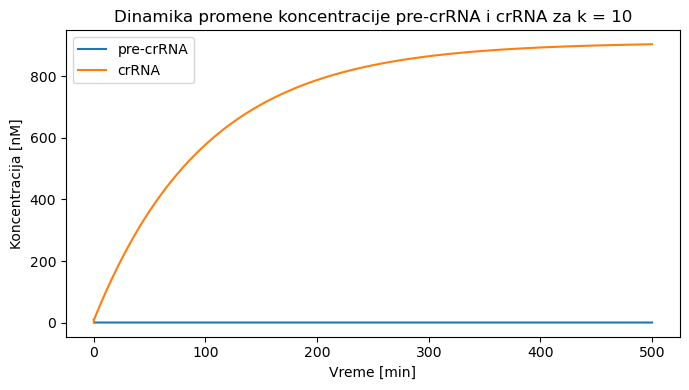

In [11]:
# Variranje vrednosti k
k = 10

for i in range(len(t) - 1):
    P_i = P[i]
    R_i = R[i]

    dP_dt = phi - (lambda_pre + k) * P_i
    dR_dt = k * P_i - lambda_cr * R_i

    P[i+1] = P_i + dt * dP_dt
    R[i+1] = R_i + dt * dR_dt

plt.figure(figsize=(7,4))
plt.plot(t, P, label="pre-crRNA")
plt.plot(t, R, label="crRNA")
plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Dinamika promene koncentracije pre-crRNA i crRNA za k = {k}")
plt.legend()
plt.tight_layout()
plt.show()

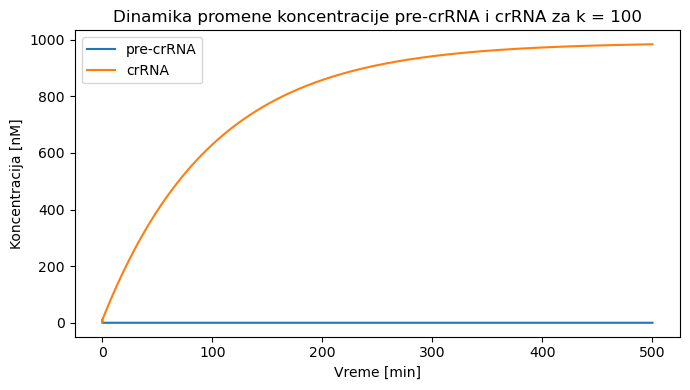

In [18]:
k = 100

for i in range(len(t) - 1):
    P_i = P[i]
    R_i = R[i]

    dP_dt = phi - (lambda_pre + k) * P_i
    dR_dt = k * P_i - lambda_cr * R_i

    P[i+1] = P_i + dt * dP_dt
    R[i+1] = R_i + dt * dR_dt

plt.figure(figsize=(7,4))
plt.plot(t, P, label="pre-crRNA")
plt.plot(t, R, label="crRNA")
plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Dinamika promene koncentracije pre-crRNA i crRNA za k = {k}")
plt.legend()
plt.tight_layout()
plt.show()

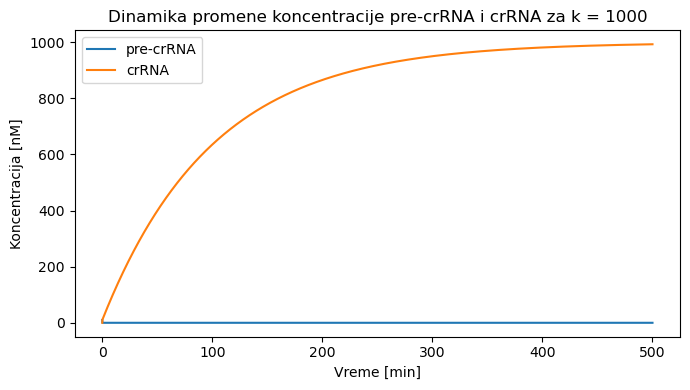

In [19]:
k = 1000

for i in range(len(t) - 1):
    P_i = P[i]
    R_i = R[i]

    dP_dt = phi - (lambda_pre + k) * P_i
    dR_dt = k * P_i - lambda_cr * R_i

    P[i+1] = P_i + dt * dP_dt
    R[i+1] = R_i + dt * dR_dt

plt.figure(figsize=(7,4))
plt.plot(t, P, label="pre-crRNA")
plt.plot(t, R, label="crRNA")
plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Dinamika promene koncentracije pre-crRNA i crRNA za k = {k}")
plt.legend()
plt.tight_layout()
plt.show()

### **1. Pretpostavite da se poveća sinteza Cas proteina koji obrađuju pre-crRNA, što povećava stopu obrade transkripta, k. Povećajte k na 10, 100 i 1000 i simulirajte dinamiku sistema u sva tri slučaja. Koju količinu dostiže crRNA?**

Kao što je prikazano iznad, najveća razlika u količini proizvedene crRNA uočava se između k = 1 i k = 10. Razlika između k = 10 i k = 100 je manja, a između k = 100 i k = 1000 je zanemarljiva.


### **2. Šta zaključujete o mogućnosti povećanja proizvodnje crRNA putem povećanja sinteze Cas proteina? Šta je ograničavajući faktor?**

Vidi se da povećanje sinteze Cas proteina može imati efekat do određene granice. Nameće se da je ograničavajući faktor u proizvodnji crRNA u stvari transkripcija pre-crRNA.

### **3. Pri k = 100, povećajte brzinu transkripcije CRISPR niza, $\phi$, na 100. Kako biste objasnili to što su u ćeliji i promotor sa kog se prepisuju *cas* geni, i promotor sa kog se prepisuje CRISPR niz, pri standardnim uslovima utišani kooperativnim vezivanjem istog globalnog regulatora (H-NS proteina)? Za kakvu je proizvodnju crRNA optimizovana regulacija CRISPR-Cas sistema?**

Kao što se vidi na grafiku niže, proizvodnja crRNA je drastično povećana, što pokazuje da je proizvodnja pre-crRNA ograničavajući faktor u nastanku crRNA. Zajednička regulacija tih transkripata ima smisla budući da ostvaruju svoje funkcije isključivo zajednički, a nikada nezavisno; pritom, aktivacija Cas proteina bez supstrata u vidu pre-crRNA mogla bi biti štetna i po samu ćeliju. CRISPR-Cas sistem je regulisan tako da je proizvodnja crRNA vrlo brza, ali i kratkotrajna.

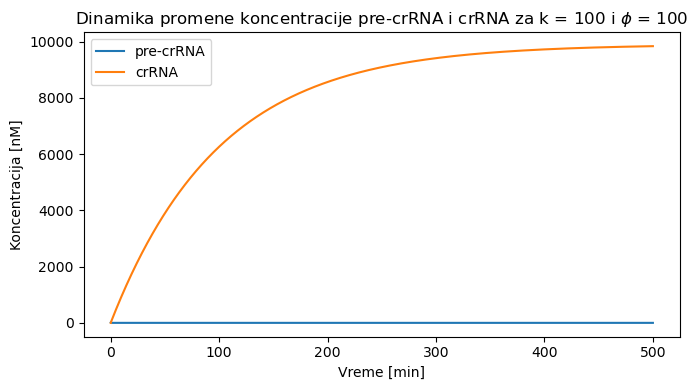

In [20]:
k = 100
phi = 100

for i in range(len(t) - 1):
    P_i = P[i]
    R_i = R[i]

    dP_dt = phi - (lambda_pre + k) * P_i
    dR_dt = k * P_i - lambda_cr * R_i

    P[i+1] = P_i + dt * dP_dt
    R[i+1] = R_i + dt * dR_dt

plt.figure(figsize=(7,4))
plt.plot(t, P, label="pre-crRNA")
plt.plot(t, R, label="crRNA")
plt.xlabel("Vreme [min]")
plt.ylabel("Koncentracija [nM]")
plt.title(f"Dinamika promene koncentracije pre-crRNA i crRNA za k = {k} i $\phi$ = {phi}")
plt.legend()
plt.tight_layout()
plt.show()